In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

SEED = 0

In [20]:
#Loading data
data = pd.read_csv("creditcard.csv", header=0)
#data.head()

In [21]:
#Handle Duplicated values
print("Duplicates", data.duplicated().sum())
data = data.drop_duplicates()
print("Rows {}, Columns {}".format(data.shape[0], data.shape[1]))

Duplicates 1081
Rows 283726, Columns 31


In [22]:
x_data = data.drop(columns=["Class"])
y_data = data["Class"]
X_train, X_test, y_train, y_test = train_test_split( x_data, y_data, test_size=0.3, random_state=SEED )

In [29]:
# Define the base classifier
base_clf = DecisionTreeClassifier()

# Define the boosting classifier
boosting_clf = AdaBoostClassifier(estimator=base_clf)

param_grid = {
    'n_estimators': [10, 50, 100],
    'learning_rate' : [1]
}
grid_search = GridSearchCV(estimator=boosting_clf, param_grid=param_grid, cv=2,verbose=3,n_jobs=-1)

grid_search.fit(X_train, y_train)
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)



Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV 1/2] END .learning_rate=1, n_estimators=100;, score=0.999 total time=   4.9s
[CV 1/2] END ..learning_rate=1, n_estimators=50;, score=0.999 total time=   5.0s
[CV 2/2] END ..learning_rate=1, n_estimators=10;, score=0.999 total time=   5.1s
[CV 2/2] END ..learning_rate=1, n_estimators=50;, score=0.999 total time=   5.1s
[CV 1/2] END ..learning_rate=1, n_estimators=10;, score=0.999 total time=   5.0s
[CV 2/2] END .learning_rate=1, n_estimators=100;, score=0.999 total time=   5.0s
Best hyperparameters:  {'learning_rate': 1, 'n_estimators': 50}
Best score:  0.9990433416579393


In [27]:
# Define the base classifier
base_clf = DecisionTreeClassifier()

# Define the boosting classifier
boosting_clf = AdaBoostClassifier(estimator=base_clf, n_estimators=50, learning_rate=1)

boosting_clf.fit(X_train, y_train)
# Evaluate the bagging classifier on the test data
y_pred = boosting_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84989
           1       0.74      0.74      0.74       129

    accuracy                           1.00     85118
   macro avg       0.87      0.87      0.87     85118
weighted avg       1.00      1.00      1.00     85118



Confusion matrix:
[[84955    34]
 [   34    95]]


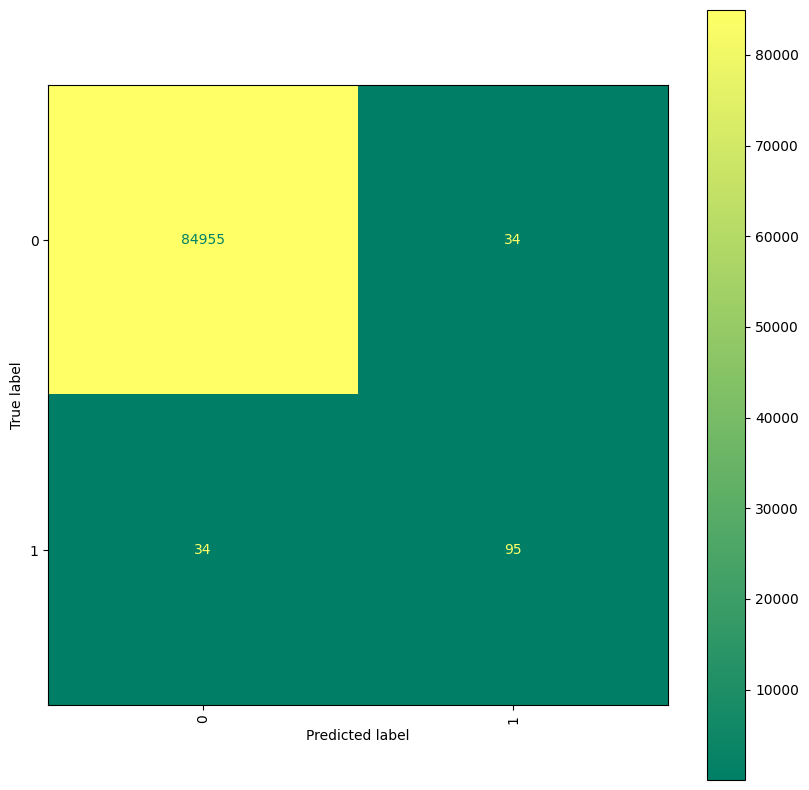

In [28]:
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                              display_labels=[0,1])

fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')
plt.show()